## DECISION TREE

#### Objective:

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

#### Tasks:
**1. Data Preparation:**

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

**2. Exploratory Data Analysis (EDA):**

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.

**3. Feature Engineering:**

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

**4. Decision Tree Classification:**

Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

**5. Hyperparameter Tuning:**

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

**6. Model Evaluation and Analysis:**

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features

**Interview Questions:**
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
   
2. What is the difference between the Label encoding and One-hot encoding?

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
dataset = pd.read_excel("heart_disease.xlsx", sheet_name = "Heart_disease")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
# EDA
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
dataset.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
# checking for missing values
dataset.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
dataset['oldpeak'].unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [7]:
# Imputing nan values in oldpeak using mean
dataset['oldpeak'] = dataset['oldpeak'].fillna(dataset['oldpeak'].mean())
dataset['oldpeak'].isnull().sum()

0

In [8]:
# Check for duplicates
if(dataset.duplicated().sum() !=0):
    print("DUPLICTES ARE PRESENT")
    print("No.of duplicated rows: ", dataset.duplicated().sum())
else:
    print("NO DUPLICATES")

# Print duplicated values
dataset[dataset.duplicated(keep = False)]

DUPLICTES ARE PRESENT
No.of duplicated rows:  1


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [9]:
# remove the duplicate row
dataset.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicates:", dataset.duplicated().sum())
dataset.shape


DataFrame after removing duplicates: 0


(907, 13)

In [10]:
# Numerical colums
num_col = dataset.select_dtypes(include = ['float64','int64'])
num_col

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.300000,0
1,41,135,203,132,0.000000,0
2,57,140,192,148,0.400000,0
3,52,118,186,190,0.000000,0
4,57,110,201,126,1.500000,0
...,...,...,...,...,...,...
903,53,125,0,120,1.500000,4
904,62,166,170,120,3.000000,4
905,56,170,0,123,2.500000,4
906,56,144,208,105,0.891253,4


In [11]:
# Categorical Columns
cat_col = dataset.select_dtypes(include = ['object','bool'])
cat_col

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,atypical angina,False,normal,False,flat,fixed defect
2,Male,asymptomatic,False,normal,False,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,False,flat,fixed defect
4,Male,asymptomatic,False,normal,True,flat,fixed defect
...,...,...,...,...,...,...,...
903,Male,asymptomatic,False,normal,False,upsloping,reversable defect
904,Male,asymptomatic,False,st-t abnormality,True,flat,reversable defect
905,Male,non-anginal,False,lv hypertrophy,True,downsloping,normal
906,Male,non-anginal,True,st-t abnormality,TURE,downsloping,fixed defect


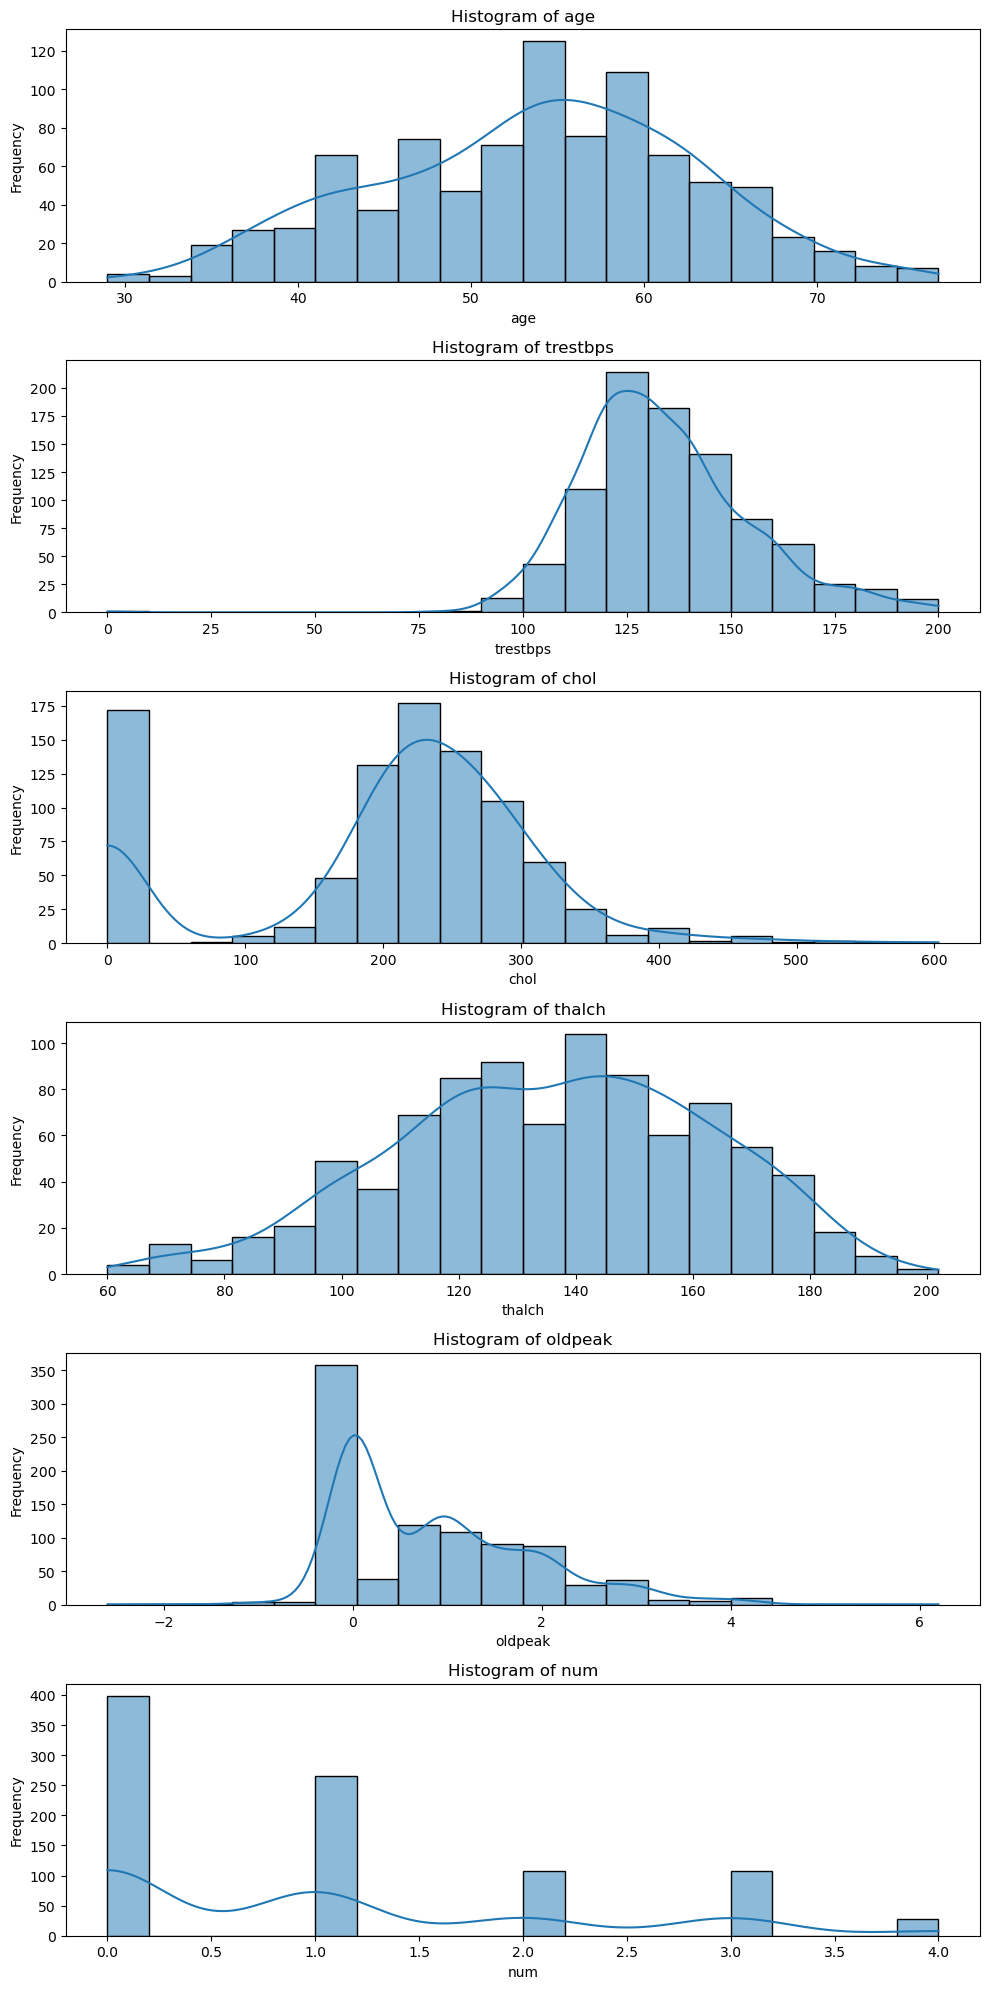

In [12]:
# Visualization
# HISTOGRAM
plt.figure(figsize = (10,20))
for i, column in enumerate(num_col.columns,1):
    plt.subplot(6,1,i)
    sns.histplot(dataset[column], bins = 20, kde = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

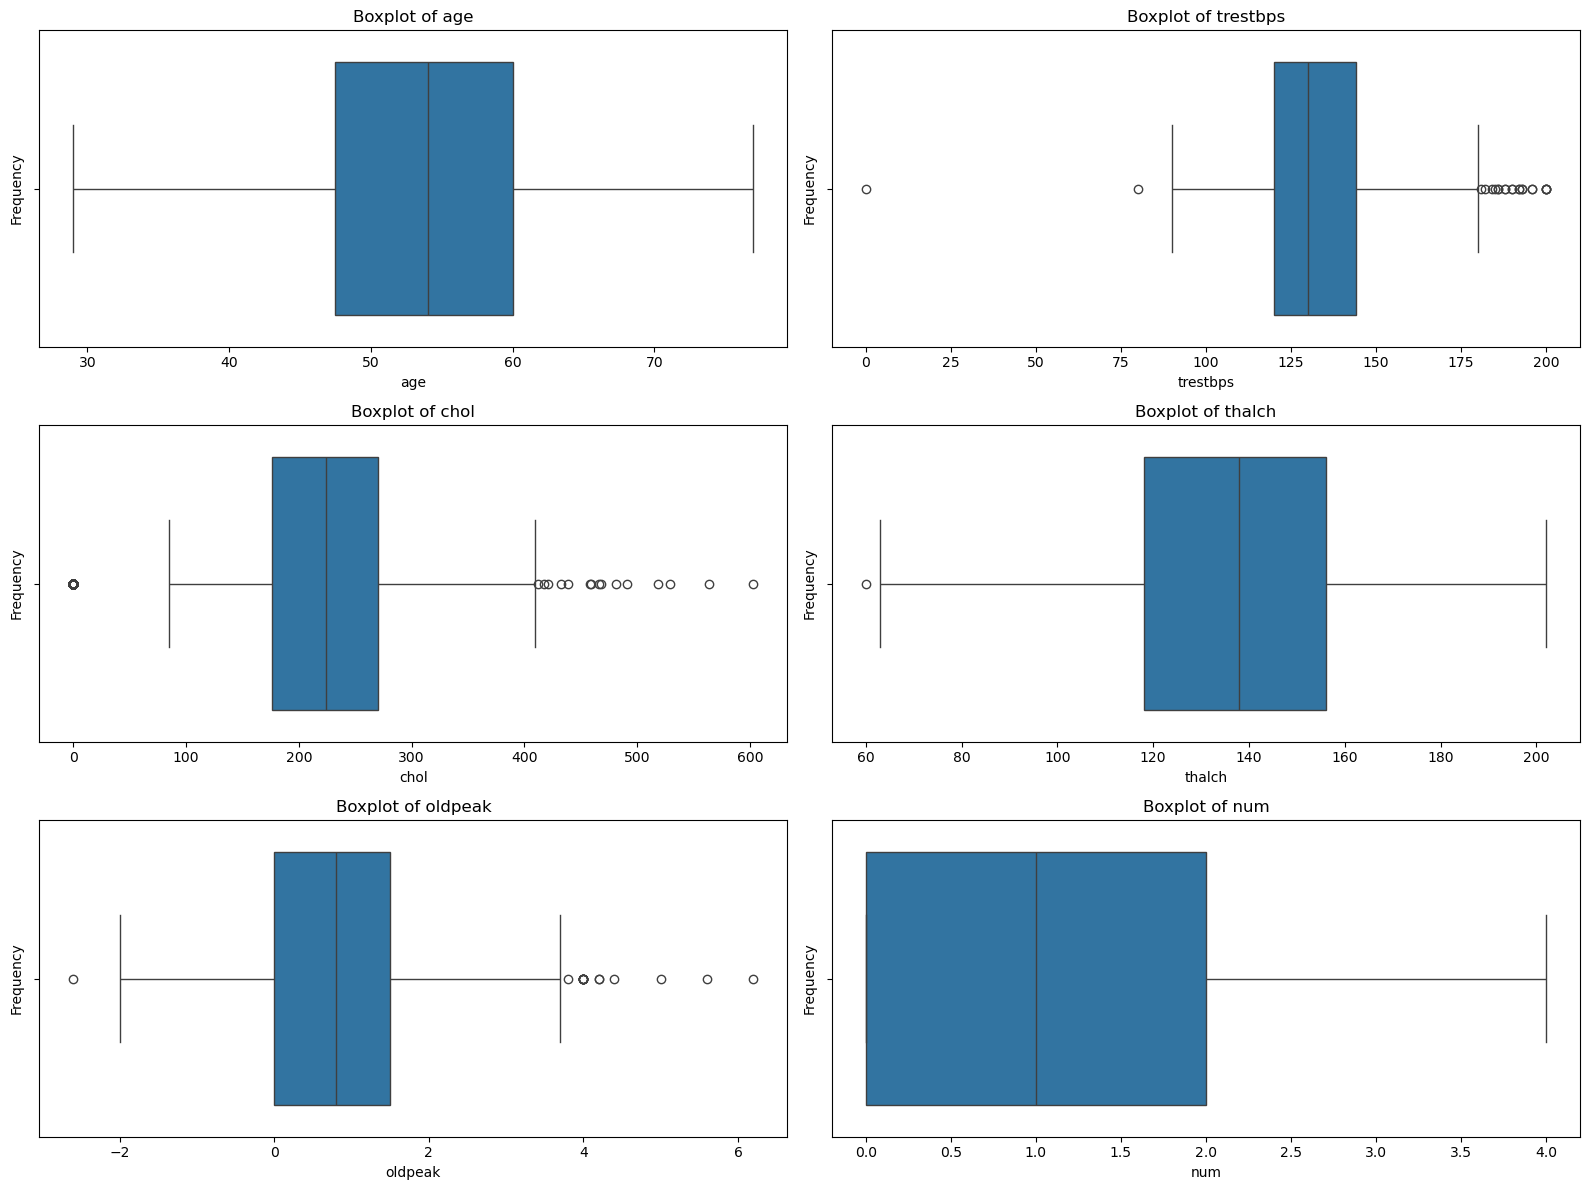

In [13]:
# BOXPLOT
plt.figure(figsize = (16,12))
for i,column in enumerate(num_col.columns,1):
    plt.subplot(3,2,i)
    sns.boxplot(x = dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

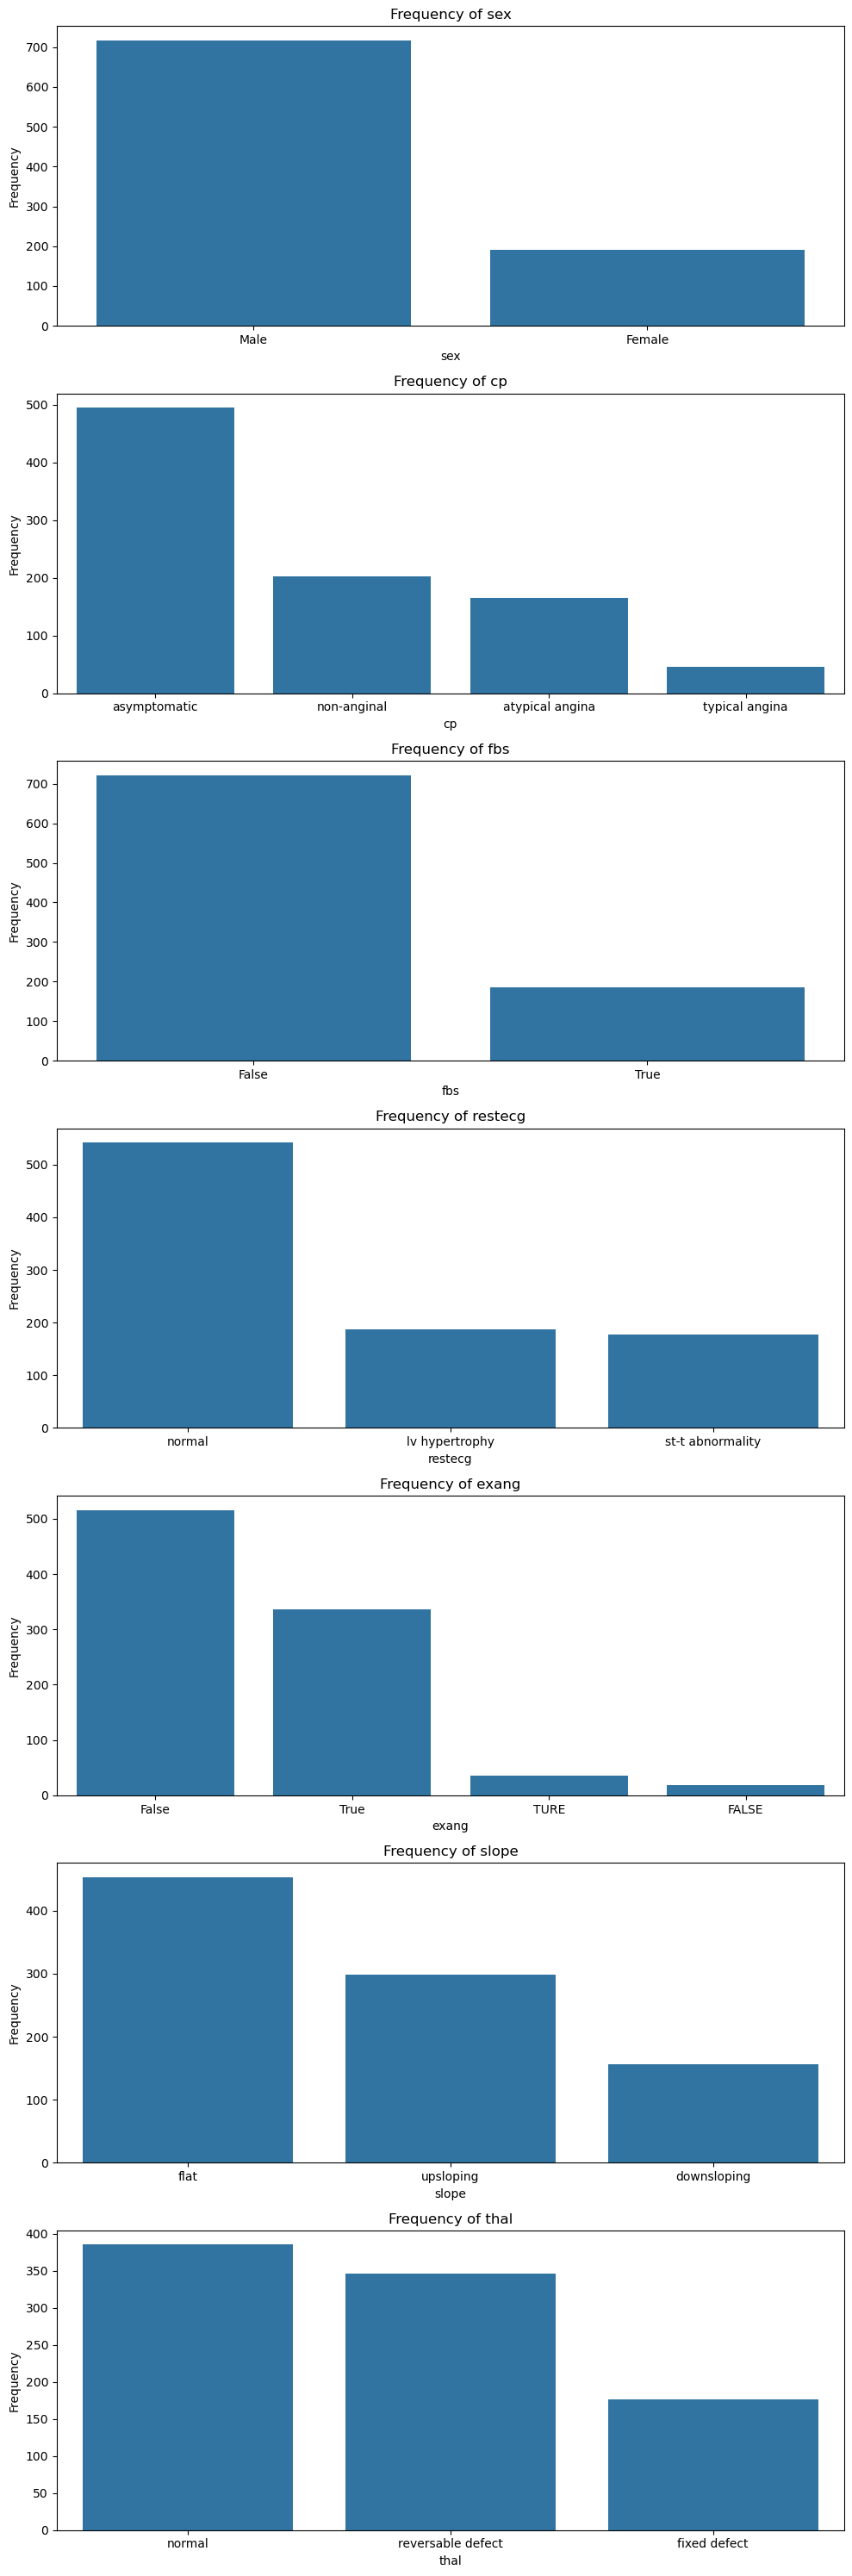

In [14]:
# BARPLOT
plt.figure(figsize = (10,30))
for i, column in enumerate(cat_col.columns, 1):
    plt.subplot(7,1,i)
    freq = dataset[column].value_counts()
    sns.barplot(x = freq.index, y = freq.values)
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

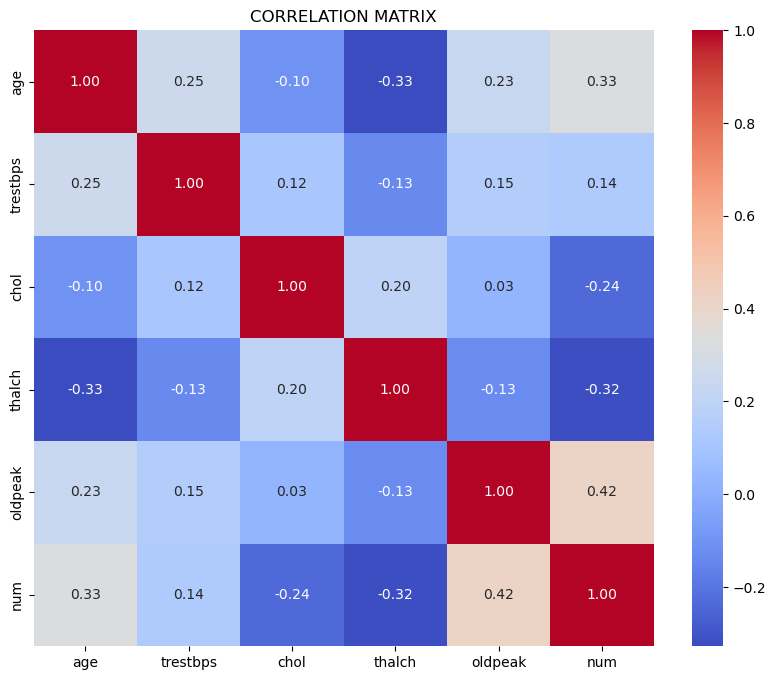

In [15]:
# HEAT MAP
plt.figure(figsize = (10, 8))
sns.heatmap(num_col.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("CORRELATION MATRIX")
plt.show()

In [16]:
# Label Encoding
data = dataset.copy()

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in cat_col.columns:
    data[col] = data[col].astype(str)
    data[col] = LE.fit_transform(data[col])

print("Cleaned data preview:\n")
data.head()

Cleaned data preview:



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [17]:
# Feature Selection: remove low-correlation or redundant features
cor_matrix = data.corr().abs()
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
upper

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,NaN,0.051947,0.068305,0.253709,0.100059,0.177004,0.008336,0.327868,0.154480,0.233265,0.053886,0.058829,0.326227
sex,NaN,NaN,0.125986,0.015988,0.191632,0.092480,0.077376,0.178484,0.160852,0.101743,0.044191,0.068596,0.259258
cp,NaN,NaN,NaN,0.007944,0.071005,0.044562,0.074455,0.249440,0.360707,0.169497,0.094762,0.079809,0.314480
trestbps,NaN,NaN,NaN,NaN,0.117392,0.112124,0.056824,0.132841,0.101730,0.153034,0.008262,0.056620,0.136581
chol,NaN,NaN,NaN,NaN,NaN,0.113651,0.195021,0.198074,0.038145,0.028901,0.047655,0.016900,0.239065
fbs,NaN,NaN,NaN,NaN,NaN,NaN,0.068311,0.065827,0.001296,0.022296,0.027616,0.017400,0.156839
restecg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.194343,0.043939,0.030135,0.082107,0.111874,0.035053
thalch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.308900,0.129435,0.223212,0.005985,0.322632
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370448,0.160800,0.091374,0.341047
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186815,0.090359,0.417724


In [18]:
# Drop features with high correlation (>0.90)
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
data_reduced = data.drop(columns = to_drop)
data_reduced

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,3,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,0,4


In [19]:
# Spliting Data
X = data_reduced.drop(columns = ['num'], axis=1)
Y = data_reduced['num']

# Scaling X values
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_SS = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X_SS.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006097,0.514775,2.322491,0.568184,0.281318,1.975526,-1.560916,0.523285,-0.773147,1.333854,-1.676279,-1.615301
1,-1.396447,0.514775,0.233746,0.077848,0.013691,-0.506194,0.015644,-0.148399,-0.773147,-0.845392,-0.226913,-1.615301
2,0.350858,0.514775,-0.810626,0.323016,-0.084439,-0.506194,0.015644,0.448654,-0.773147,-0.466392,-0.226913,-1.615301
3,-0.195175,0.514775,2.322491,-0.755723,-0.137964,-0.506194,-1.560916,2.015918,-0.773147,-0.845392,-0.226913,-1.615301
4,0.350858,0.514775,-0.810626,-1.147992,-0.004151,-0.506194,0.015644,-0.372294,1.262395,0.575856,-0.226913,-1.615301


In [20]:
# Train-Test-Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SS, Y, test_size=0.2, random_state = 42)

Training Accuracy: 1.0
Test Accuracy: 0.532967032967033


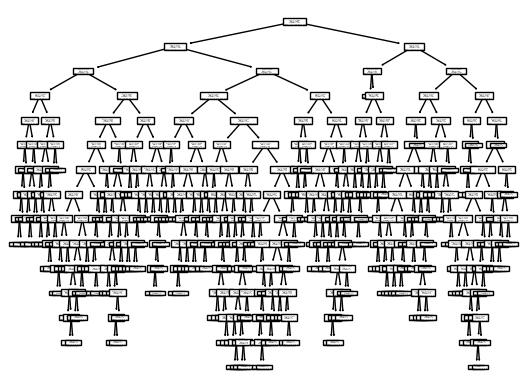

In [21]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predicting on test data
y_predict_test = model.predict(X_test)

# Predicting on train data
y_predict_train = model.predict(X_train)

# Accuracy
print("Training Accuracy:", np.mean(y_predict_train == y_train))
print("Test Accuracy:", np.mean(y_predict_test == y_test))

# Plot Tree
plot_tree(model)
plt.show()

In [22]:
# Hyperparameter Tuning
parameters = [
    {'max_depth':3, 'min_samples_split':10, 'min_samples_leaf' :5, 'criterion':'gini'},
    {'max_depth':5, 'min_samples_split':10, 'min_samples_leaf':5, 'criterion':'gini'},
    {'max_depth':7, 'min_samples_split':10, 'min_samples_leaf':5, 'criterion':'gini'},
    {'max_depth':10, 'min_samples_split':10, 'min_samples_leaf':5, 'criterion': 'gini'},
    {'max_depth':3, 'min_samples_split':10, 'min_samples_leaf':5, 'criterion':'entropy'},
    {'max_depth':5, 'min_samples_split':10, 'min_samples_leaf':5, 'criterion':'entropy'},
    {'max_depth':7, 'min_samples_split':10, 'min_samples_leaf':5, 'criterion':'entropy'},
    {'max_depth':10,'min_samples_split':10, 'min_samples_leaf':5, 'criterion': 'entropy'}
]
results = []

for i, params in enumerate(parameters):
    model = DecisionTreeClassifier(
        ccp_alpha = 0.05,
        max_depth = params['max_depth'],
        min_samples_split = params['min_samples_split'],
        min_samples_leaf = params['min_samples_leaf'],
        criterion = params['criterion'],
        random_state = 42
    )

    # Fit model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Accuracy score
    from sklearn.metrics import accuracy_score
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test) 
    results.append((params, train_acc, test_acc))
    print(f"Model {i+1}: {params} --> Training Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}\n")
    
# Best model
best_params = max(results, key = lambda x: x[1])[0]
print("\nBest Parameters:", best_params)

Model 1: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'gini'} --> Training Accuracy = 0.5310, Test Accuracy = 0.5934

Model 2: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'gini'} --> Training Accuracy = 0.5310, Test Accuracy = 0.5934

Model 3: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'gini'} --> Training Accuracy = 0.5310, Test Accuracy = 0.5934

Model 4: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'gini'} --> Training Accuracy = 0.5310, Test Accuracy = 0.5934

Model 5: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'entropy'} --> Training Accuracy = 0.5352, Test Accuracy = 0.5824

Model 6: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'entropy'} --> Training Accuracy = 0.5352, Test Accuracy = 0.5824

Model 7: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 

In [23]:
# 6. Final Model & Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred_final = best_model.predict(X_test)

print("\nFinal Model Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("Accuracy Score:", np.round(accuracy_score(y_test, y_pred_final),4))


Final Model Evaluation
Confusion Matrix:
 [[77  7  5  0  0]
 [21 23  3  0  0]
 [ 7 10  3  0  0]
 [ 9  8  0  0  0]
 [ 6  2  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.87      0.74        89
           1       0.46      0.49      0.47        47
           2       0.25      0.15      0.19        20
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         9

    accuracy                           0.57       182
   macro avg       0.27      0.30      0.28       182
weighted avg       0.46      0.57      0.50       182

Accuracy Score: 0.5659


C:\Users\adwai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adwai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adwai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


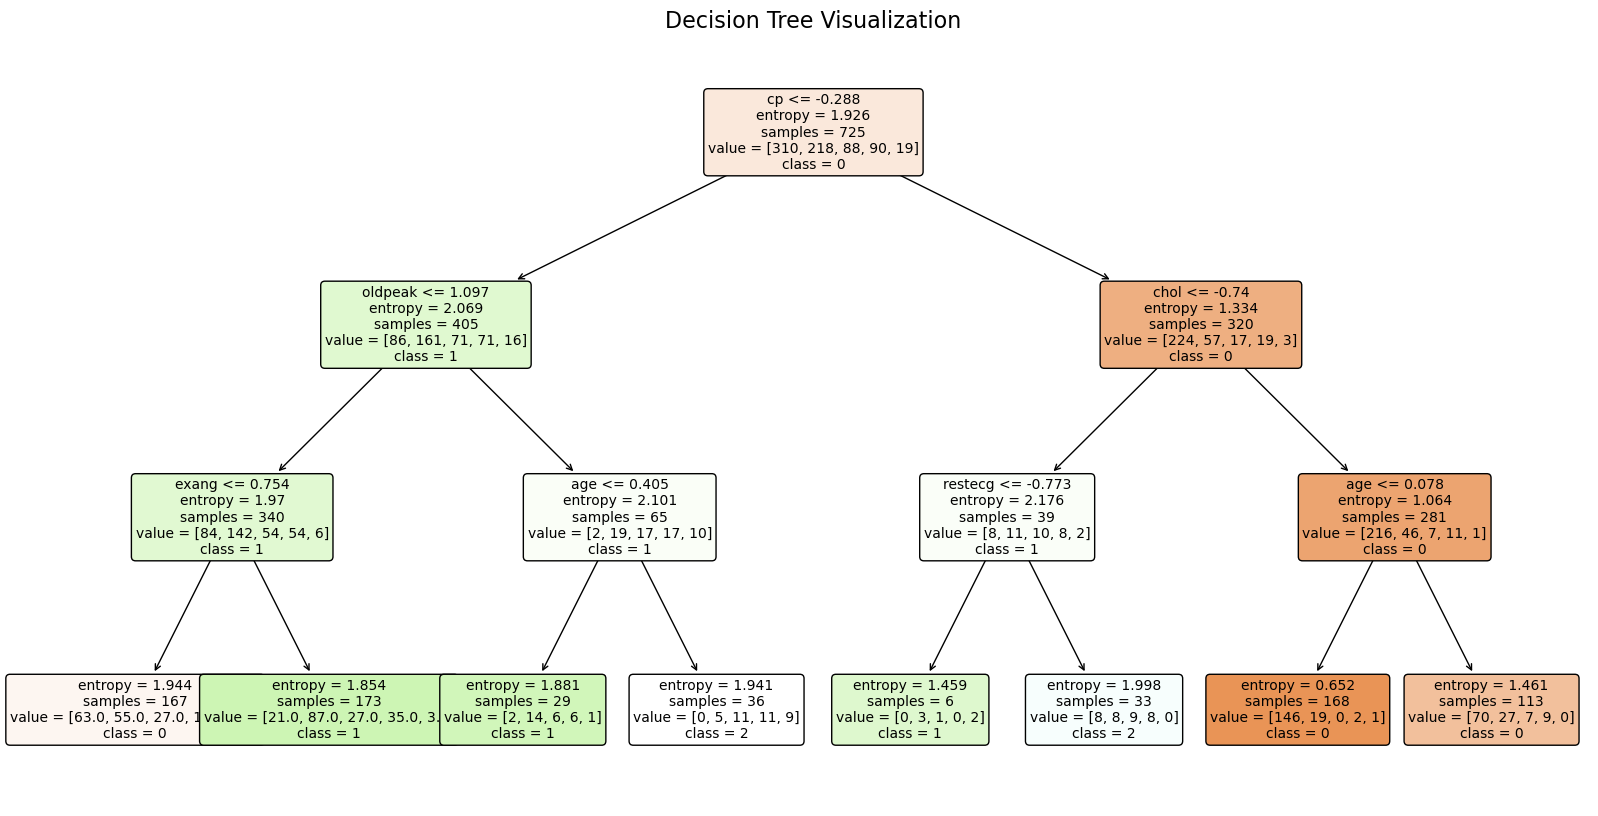

In [24]:
# Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names = X.columns,
    class_names = ['0','1','2','3','4'],
    filled = True,
    rounded = True,
    fontsize = 10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

In [25]:
# Export readable rules
from sklearn.tree import export_text
print("\nDecision Rules:\n")
tree_rules = export_text(best_model, feature_names=list(X_SS.columns))
print(tree_rules)


Decision Rules:

|--- cp <= -0.29
|   |--- oldpeak <= 1.10
|   |   |--- exang <= 0.75
|   |   |   |--- class: 0
|   |   |--- exang >  0.75
|   |   |   |--- class: 1
|   |--- oldpeak >  1.10
|   |   |--- age <= 0.41
|   |   |   |--- class: 1
|   |   |--- age >  0.41
|   |   |   |--- class: 2
|--- cp >  -0.29
|   |--- chol <= -0.74
|   |   |--- restecg <= -0.77
|   |   |   |--- class: 1
|   |   |--- restecg >  -0.77
|   |   |   |--- class: 2
|   |--- chol >  -0.74
|   |   |--- age <= 0.08
|   |   |   |--- class: 0
|   |   |--- age >  0.08
|   |   |   |--- class: 0



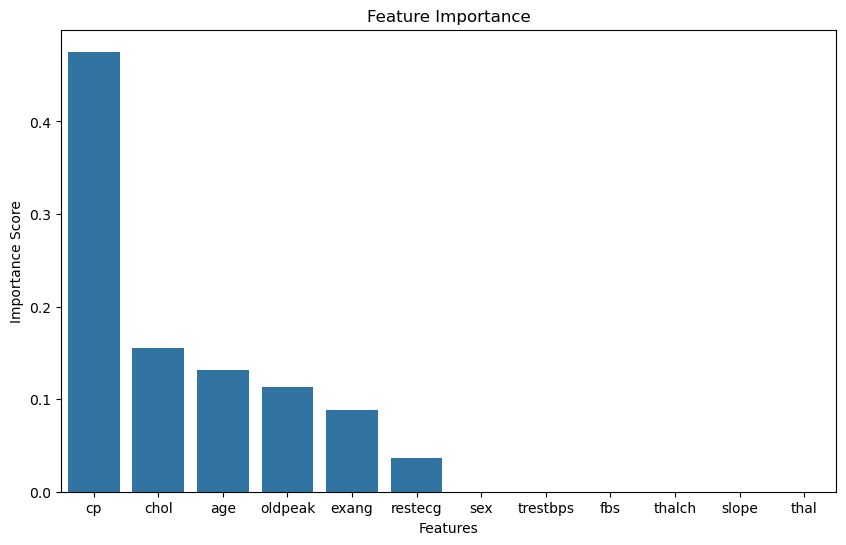

In [26]:
# Feature importance plot
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x = importances.index, y = importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

The model shows that **chest pain type** is the most significant indicator of heart disease. **Cholesterol, age, and exercise-induced angina, ECG in resting condition** further refine predictions. This tree provides a transparent, interpretable way to classify patients and could assist medical professionals in identifying high-risk individuals.

### INTERVIEW QUESTIONS
***1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?***

1. max_depth

Effect: Smaller max_depth: Limits tree size, reduces overfitting, and increases bias. Larger max_depth: Allows the tree to grow deeper, reducing bias but increasing the risk of overfitting.

2. min_samples_split

Effect: Larger value: Limits splits, resulting in simpler trees (reduces overfitting). Smaller value: Allows more splits, leading to complex trees (increases risk of overfitting).

3. min_samples_leaf

Effect: Larger value: Forces leaves to have more samples, creating a simpler tree and reducing overfitting. Smaller value: Allows smaller leaf nodes, increasing complexity.

4. max_features

Effect: Smaller value: Reduces computational cost and randomness; may prevent overfitting but risks underfitting. Larger value: Increases model's ability to capture relationships but may lead to overfitting.

5. max_leaf_nodes

Effect: Smaller value: Creates simpler trees, reduces overfitting. Larger value: Allows more complexity but increases overfitting risk.

6. min_impurity_decrease (or min_impurity_split in older versions)

Effect: Larger value: Reduces splits, leading to simpler trees. Smaller value: Encourages more splits, creating complex trees.

7. criterion

Effect: Both perform similarly, but entropy might be slower due to log calculations.

8. class_weight

Effect: Adjusts the decision threshold to handle imbalanced classes better.

9. splitter

Choices: best: Chooses the best split among all features.

random: Chooses the best split among a random subset of features.

Effect: random adds randomness, helping in ensemble methods like Random Forest.

***2. What is the difference between the Label encoding and One-hot encoding?***

**Label Encoding**

Assigns a unique integer value to each category in a categorical feature.

-->Advantages:

Simple and efficient for ordinal data (categories with a natural order, like "Low", "Medium", "High").

Consumes less memory as it represents categories with a single column.

-->Disadvantages:

Introduces an artificial ordinal relationship between categories that might not exist for nominal data (e.g., "Red" being less than "Blue").

Can lead to biased models if the algorithm interprets these numbers as having a magnitude or order.

**One-Hot Encoding**

Converts each category into a separate binary column. For each row, one column is set to 1 (indicating the presence of that category), and all others are set to 0.

-->Advantages:

Does not introduce ordinal relationships between categories.

Works well with algorithms sensitive to numerical magnitudes or distances, like Logistic Regression, SVM, and Neural Networks.

-->Disadvantages:

Increases the dimensionality of the dataset, especially when the number of categories is large, leading to potential memory and computational inefficiency.

Can lead to the dummy variable trap (multicollinearity) if one-hot encoded features are used without dropping one column.